In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df_business= pd.read_pickle('./Datasets/business.pkl')
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_business.shape

(150346, 28)

In [57]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [58]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

- Hay columnas duplicadas

In [59]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [60]:
df_business['state'].value_counts()

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

- Porcentaje de nulos

In [61]:
#porcentaje de nulos por columna
n_records = len(df_business)
def valores_inexistentes_col(df):
    for columna in df_business:
        print("{} | {} | {}".format(
            df_business[columna].name, len(df_business[df_business[columna].isnull()]) / (1.0*n_records), df_business[columna].dtype
        ))

valores_inexistentes_col(df_business)

business_id | 0.0 | object
name | 0.0 | object
address | 0.0 | object
city | 0.0 | object
state | 1.9953972835991645e-05 | object
postal_code | 0.0 | object
latitude | 0.0 | object
longitude | 0.0 | object
stars | 0.0 | object
review_count | 0.0 | object
is_open | 0.0 | object
attributes | 0.0914158008859564 | object
categories | 0.0006850864007023798 | object
hours | 0.15446370372341134 | object


In [62]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [63]:
df_business.categories.value_counts()

categories
Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, B

In [64]:
duplicados = df_business['categories'].duplicated().sum()
print("Cantidad de duplicados en 'categories':", duplicados)

Cantidad de duplicados en 'categories': 67185


Se eliminan los valores nulos en "categories":

In [65]:
df_business = df_business.dropna(subset=['categories'])

In [66]:
# Se observan los negocios de California
filtrado= df_business[df_business['state']=='CA']
filtrado['categories'].value_counts()

categories
Restaurants, Pizza                                                                                                                                       40
Beauty & Spas, Nail Salons                                                                                                                               39
Restaurants, Mexican                                                                                                                                     31
Pizza, Restaurants                                                                                                                                       28
Nail Salons, Beauty & Spas                                                                                                                               26
                                                                                                                                                         ..
Home & Garden, Shopping, Rugs, Mattresses, Furniture 

- Filtramos por categoria que contenga restaurants y que sean del estado de california

In [67]:
df_restaurantes= df_business[df_business['categories'].str.lower().str.contains('restaurant')].reset_index(drop=True)

In [68]:
df_restaurantes.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [69]:
# Fijamos los limites de latitud y longitud para filtrar los restaurantes de california
latitud_max = 41.7
latitud_min = 32.5
longitud_max = -114.6
longitud_min = -124.08

# Se establecen las mascaras para filtrar el df
mascara_latitud = (df_restaurantes['latitude'] >= latitud_min) & (df_restaurantes['latitude'] <= latitud_max)
mascara_longitud = (df_restaurantes['longitude'] >= longitud_min) & (df_restaurantes['longitude'] <= longitud_max)

# Se filtra el dataframe:
df_restaurantes_CA = df_restaurantes[mascara_latitud & mascara_longitud]
df_restaurantes_CA = df_restaurantes_CA.reset_index(drop=True)
df_restaurantes_CA.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,AB,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
1,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,PA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
2,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,5191 Meadowood Mall Cir,Reno,PA,89502,39.476518,-119.784037,4.5,5,1,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Dogs...","Sporting Goods, Sports Wear, Fashion, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
3,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,TN,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
4,Lx8ZYUJ_-3Aa8N821mN1WQ,ALM Kainan,"390 N McCarran Blvd, Ste B",Sparks,PA,89434,39.537179,-119.735532,4.0,13,0,"{'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...","Restaurants, Filipino","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."


In [70]:
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   2835 non-null   object
 1   name          2835 non-null   object
 2   address       2835 non-null   object
 3   city          2835 non-null   object
 4   state         2835 non-null   object
 5   postal_code   2835 non-null   object
 6   latitude      2835 non-null   object
 7   longitude     2835 non-null   object
 8   stars         2835 non-null   object
 9   review_count  2835 non-null   object
 10  is_open       2835 non-null   object
 11  attributes    2807 non-null   object
 12  categories    2835 non-null   object
 13  hours         2417 non-null   object
dtypes: object(14)
memory usage: 310.2+ KB


Se filtran los restaurantes que están abiertos:

In [71]:
df_restaurantes_CA= df_restaurantes_CA[df_restaurantes_CA['is_open']==1].reset_index(drop=True)

Se eliminan columnas que no se van a utilizar:

In [72]:
df_restaurantes_CA.drop(columns=['is_open','state'], inplace=True)

In [73]:
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   1744 non-null   object
 1   name          1744 non-null   object
 2   address       1744 non-null   object
 3   city          1744 non-null   object
 4   postal_code   1744 non-null   object
 5   latitude      1744 non-null   object
 6   longitude     1744 non-null   object
 7   stars         1744 non-null   object
 8   review_count  1744 non-null   object
 9   attributes    1721 non-null   object
 10  categories    1744 non-null   object
 11  hours         1618 non-null   object
dtypes: object(12)
memory usage: 163.6+ KB


In [74]:
df_restaurantes_CA.categories.value_counts()

categories
Restaurants, Mexican                                                                    48
Mexican, Restaurants                                                                    40
Restaurants, Pizza                                                                      21
Pizza, Restaurants                                                                      16
Restaurants, Chinese                                                                    12
                                                                                        ..
Food, Delis, Restaurants, Grocery, Beer, Wine & Spirits                                  1
Asian Fusion, Japanese, Gluten-Free, Restaurants                                         1
American (New), Food, Restaurants                                                        1
Restaurants, Food, Desserts, Breakfast & Brunch, Coffee & Tea                            1
Restaurants, Burgers, Food, Ice Cream & Frozen Yogurt, American (Traditional), 

In [75]:
categorias_unicas = df_restaurantes_CA['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Restaurants, Italian
Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries
Sporting Goods, Sports Wear, Fashion, Restaurants, Fast Food, Sandwiches, Shopping
Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife
Italian, Seafood, American (Traditional), Steakhouses, Restaurants, Comfort Food
Event Planning & Services, Restaurants, Empanadas, Caterers, Food, Desserts, Comfort Food, American (Traditional), Food Trucks
Pizza, Restaurants
Burgers, Cafes, Restaurants, Mexican, American (Traditional)
Food, Restaurants, Chinese, Bubble Tea, Vietnamese
Chicken Wings, Salad, Restaurants, Pizza, Italian, Sandwiches
Bars, Nightlife, American (Traditional), Music Venues, Food, Arts & Entertainment, Restaurants, Breweries
Bars, Nightlife, Mexican, Restaurants, Seafood
Restaurants, Thai
Restaurants, Fast Food, Mexican
Food Trucks, Food, Salad, Sandwiches, Caterers, Event Planning & Services, Restaurants, Wraps
Food Delivery Services, Fo

In [76]:
categorias_interes = ['Argentine',
                    'Argentinian',
                    'Brazilian',
                    'Caribbean',
                    'Chilean',
                    'Colombian',
                    'Cuban',
                    'Dominican',
                    'Latin American',
                    'Mexican',
                    'Mexican',
                    'Peruvian',
                    'Puerto Rican',
                    'Salvadoran',
                    'Spanish',
                    'Tacos',
                    'TacosMex',
                    'Tex-Mex',
                    'Venezuelan']

# Convertir la columna 'categories' a minúsculas y realizar la búsqueda para cada palabra clave
condiciones = [df_restaurantes_CA['categories'].str.lower().str.contains(palabra.lower()) for palabra in categorias_interes]

# Aplicar la lógica OR a las condiciones para obtener el DataFrame filtrado
df_filtrado = df_restaurantes_CA[pd.concat(condiciones, axis=1).any(axis=1)]

# Imprimir el DataFrame filtrado
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 7 to 1739
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   344 non-null    object
 1   name          344 non-null    object
 2   address       344 non-null    object
 3   city          344 non-null    object
 4   postal_code   344 non-null    object
 5   latitude      344 non-null    object
 6   longitude     344 non-null    object
 7   stars         344 non-null    object
 8   review_count  344 non-null    object
 9   attributes    333 non-null    object
 10  categories    344 non-null    object
 11  hours         316 non-null    object
dtypes: object(12)
memory usage: 34.9+ KB


In [77]:
categorias_unicas = df_filtrado['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Burgers, Cafes, Restaurants, Mexican, American (Traditional)
Bars, Nightlife, Mexican, Restaurants, Seafood
Restaurants, Fast Food, Mexican
Restaurants, Chicken Wings, Mexican, Fast Food
Street Vendors, Food, Restaurants, Mexican, Food Stands
Restaurants, Mexican, Event Planning & Services, Caterers
Fast Food, Restaurants, Mexican
American (Traditional), Restaurants, Seafood, Burgers, Tacos, Sandwiches, Mexican, Bars, Food, Beer Bar, Juice Bars & Smoothies, Nightlife
Tacos, Mexican, Specialty Food, Restaurants, Food
Restaurants, Mexican, Tacos, Breakfast & Brunch, Tex-Mex, Fast Food
Mexican, Restaurants, Food Trucks, Food
Mexican, Arts & Entertainment, Festivals, Restaurants, Religious Organizations, Churches
Restaurants, Fast Food, Mexican, Tacos, Burgers, Breakfast & Brunch
Restaurants, Mexican, Seafood, Bars, Nightlife
Food, Italian, Cocktail Bars, Nightlife, Waffles, Tacos, Mexican, Bars, Desserts, Breakfast & Brunch, Restaurants, Pizza
Restaurants, Mexican
Restaurants, Food Trucks

In [78]:
df_filtrado.reset_index(drop=True, inplace=True)
df_filtrado.shape

(344, 12)

In [79]:
df_filtrado.drop(columns=['hours'], inplace=True)

In [80]:
df_filtrado.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,93117,34.430542,-119.882367,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American..."
1,UX3eq0WsVva-cqlVrzyzFg,Cantina Los Tres Hombres,926 Victorian Ave,Sparks,89431,39.535111,-119.754857,3.0,284,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Bars, Nightlife, Mexican, Restaurants, Seafood"
2,YhQAQhG1IkXJH7oLZMbM9w,Del Taco,252 Los Altos Pkwy,Sparks,89431,39.583653,-119.740935,1.5,60,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Restaurants, Fast Food, Mexican"
3,RCguFZat10TcbDMeeeM3IQ,El Pollo Loco,8030 S Virginia St,Reno,89511,39.455549,-119.778196,3.0,73,"{'RestaurantsTableService': 'False', 'GoodForK...","Restaurants, Chicken Wings, Mexican, Fast Food"
4,zJFs_-Qtw7fzAsrQvA3Ltw,El Carrito,340 Kietzke Ln,Reno,89502,39.525125,-119.788625,5.0,6,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Street Vendors, Food, Restaurants, Mexican, Fo..."


In [81]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   344 non-null    object
 1   name          344 non-null    object
 2   address       344 non-null    object
 3   city          344 non-null    object
 4   postal_code   344 non-null    object
 5   latitude      344 non-null    object
 6   longitude     344 non-null    object
 7   stars         344 non-null    object
 8   review_count  344 non-null    object
 9   attributes    333 non-null    object
 10  categories    344 non-null    object
dtypes: object(11)
memory usage: 29.7+ KB


- 344 restaurantes latinoamericanos activos en California

In [82]:
len(df_filtrado['business_id'].unique())

344

In [83]:
# Se realiza una copia del dataset para realizar la apertura por categorías
df_categories = df_filtrado.copy()
df_categories = df_categories[["business_id", "categories"]]
df_categories.head()

,business_id,categories
0,VeFfrEZ4iWaecrQg6Eq4cg,"Burgers, Cafes, Restaurants, Mexican, American..."
1,UX3eq0WsVva-cqlVrzyzFg,"Bars, Nightlife, Mexican, Restaurants, Seafood"
2,YhQAQhG1IkXJH7oLZMbM9w,"Restaurants, Fast Food, Mexican"
3,RCguFZat10TcbDMeeeM3IQ,"Restaurants, Chicken Wings, Mexican, Fast Food"
4,zJFs_-Qtw7fzAsrQvA3Ltw,"Street Vendors, Food, Restaurants, Mexican, Fo..."


In [84]:
df_categories.shape

(344, 2)

In [85]:
# Se realiza la apertura de categorías:
df_categories = df_categories.assign(categories=df_categories['categories'].str.split(',')).explode('categories')
df_categories["categories"] = df_categories["categories"].str.strip()
df_categories.shape

(1591, 2)

In [86]:
# Se observan los valores únicos en categorías:
lista_cat = df_categories["categories"].unique()
lista_cat

array(['Burgers', 'Cafes', 'Restaurants', 'Mexican',
       'American (Traditional)', 'Bars', 'Nightlife', 'Seafood',
       'Fast Food', 'Chicken Wings', 'Street Vendors', 'Food',
       'Food Stands', 'Event Planning & Services', 'Caterers', 'Tacos',
       'Sandwiches', 'Beer Bar', 'Juice Bars & Smoothies',
       'Specialty Food', 'Breakfast & Brunch', 'Tex-Mex', 'Food Trucks',
       'Arts & Entertainment', 'Festivals', 'Religious Organizations',
       'Churches', 'Italian', 'Cocktail Bars', 'Waffles', 'Desserts',
       'Pizza', 'American (New)', 'Barbeque', 'Bakeries', 'Coffee & Tea',
       'Peruvian', 'Latin American', 'Salvadoran', 'Salad', 'Soup',
       'Art Galleries', 'Shopping', 'Venues & Event Spaces',
       'Arts & Crafts', 'Home Decor', 'Home & Garden', 'Imported Food',
       'Fruits & Veggies', 'Ethnic Food', 'Sports Bars', 'Wineries',
       'Dance Clubs', 'Music Venues', 'Japanese', 'Poke', 'Asian Fusion',
       'Food Delivery Services', 'Beer', 'Wine & Spirits

In [87]:
# Se seleccionan las categorías que vamos a analizar
latin_categories = ['Mexican', 'Tex-Mex', 'Tacos', 'Latin American',
       'Caribbean', 'Venezuelan','Colombian','Cuban','Empanadas','New Mexican Cuisine','Peruvian','Puerto Rican',
       'Brazilian', 'Argentine', 'Salvadoran']

# Se filtran las categorías en el dataframe
df_categories = df_categories[df_categories["categories"].isin(latin_categories)]
df_categories.shape

(472, 2)

In [88]:
# Se renombra la columna "categories" a "subcategory"
df_categories = df_categories.rename(columns={"categories":"subcategory"})

# Se crea la columna "category" en funcion a los valores de la subcategoría
df_categories.loc[df_categories['subcategory'].isin(['Mexican', 'Tex-Mex', 'Tacos','New Mexican Cuisine']), 'category'] = "Mexican restaurant"
df_categories.loc[df_categories['subcategory'] == "Latin American", 'category'] = "Latin American restaurant"
df_categories.loc[df_categories['subcategory'] == "Caribbean", 'category'] = "Caribbean restaurant"
df_categories.loc[df_categories['subcategory'] == "Venezuelan", 'category'] = "Venezuelan restaurant"
df_categories.loc[df_categories['subcategory'] == "Colombian", 'category'] = "Colombian restaurant"
df_categories.loc[df_categories['subcategory'] == "Cuban", 'category'] = "Cuban restaurant"
df_categories.loc[df_categories['subcategory'].isin(['Empanadas', 'Argentine']), 'category'] = "Argentinian restaurant"
df_categories.loc[df_categories['subcategory'] == "Peruvian", 'category'] = "Peruvian restaurant"
df_categories.loc[df_categories['subcategory'] == "Puerto Rican", 'category'] = "Puerto Rican restaurant"
df_categories.loc[df_categories['subcategory'] == "Brazilian", 'category'] = "Brazilian restaurant"
df_categories.loc[df_categories['subcategory'] == "Salvadoran", 'category'] = "Salvadoran restaurant"

df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 0 to 343
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  472 non-null    object
 1   subcategory  472 non-null    object
 2   category     472 non-null    object
dtypes: object(3)
memory usage: 14.8+ KB


In [89]:
df_categories.head()

,business_id,subcategory,category
0,VeFfrEZ4iWaecrQg6Eq4cg,Mexican,Mexican restaurant
1,UX3eq0WsVva-cqlVrzyzFg,Mexican,Mexican restaurant
2,YhQAQhG1IkXJH7oLZMbM9w,Mexican,Mexican restaurant
3,RCguFZat10TcbDMeeeM3IQ,Mexican,Mexican restaurant
4,zJFs_-Qtw7fzAsrQvA3Ltw,Mexican,Mexican restaurant


In [90]:
# Se exporta el listado de categorías a un archivo parquet:
df_categories.to_parquet("categories_yelp.parquet")

In [91]:
# Se elimina la columna "categories" del df original:
df_filtrado.drop(columns=['categories'], inplace=True)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   344 non-null    object
 1   name          344 non-null    object
 2   address       344 non-null    object
 3   city          344 non-null    object
 4   postal_code   344 non-null    object
 5   latitude      344 non-null    object
 6   longitude     344 non-null    object
 7   stars         344 non-null    object
 8   review_count  344 non-null    object
 9   attributes    333 non-null    object
dtypes: object(10)
memory usage: 27.0+ KB


In [92]:
# Se crea una tabla nueva con los atributos de los restaurantes
atributos_restaurant = df_filtrado[["business_id", "attributes"]]
atributos_restaurant = pd.concat([atributos_restaurant, pd.json_normalize(atributos_restaurant["attributes"])], axis=1)
atributos_restaurant = atributos_restaurant.drop(columns="attributes")
atributos_restaurant.head()

,business_id,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,WiFi,RestaurantsAttire,RestaurantsPriceRange2,RestaurantsTakeOut,GoodForKids,HasTV,RestaurantsReservations,...,GoodForDancing,CoatCheck,Music,BestNights,ByAppointmentOnly,AgesAllowed,BYOBCorkage,Open24Hours,DietaryRestrictions,RestaurantsCounterService
0,VeFfrEZ4iWaecrQg6Eq4cg,True,True,u'no','casual',1,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UX3eq0WsVva-cqlVrzyzFg,True,True,u'no','casual',2,True,True,True,True,...,False,False,"{'dj': False, 'background_music': False, 'no_m...","{'monday': False, 'tuesday': False, 'friday': ...",NaN,NaN,NaN,NaN,NaN,NaN
2,YhQAQhG1IkXJH7oLZMbM9w,True,True,'no','casual',2,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RCguFZat10TcbDMeeeM3IQ,True,True,u'no','casual',1,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zJFs_-Qtw7fzAsrQvA3Ltw,NaN,False,u'no',NaN,NaN,True,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
atributos_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   business_id                 344 non-null    object
 1   RestaurantsGoodForGroups    275 non-null    object
 2   BusinessAcceptsCreditCards  307 non-null    object
 3   WiFi                        278 non-null    object
 4   RestaurantsAttire           250 non-null    object
 5   RestaurantsPriceRange2      283 non-null    object
 6   RestaurantsTakeOut          316 non-null    object
 7   GoodForKids                 265 non-null    object
 8   HasTV                       295 non-null    object
 9   RestaurantsReservations     286 non-null    object
 10  BusinessParking             310 non-null    object
 11  BusinessAcceptsBitcoin      57 non-null     object
 12  NoiseLevel                  250 non-null    object
 13  OutdoorSeating              295 non-null    object

In [94]:
# Se elimina la columna "attributes" del df original:
df_filtrado = df_filtrado.drop(columns="attributes")
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   344 non-null    object
 1   name          344 non-null    object
 2   address       344 non-null    object
 3   city          344 non-null    object
 4   postal_code   344 non-null    object
 5   latitude      344 non-null    object
 6   longitude     344 non-null    object
 7   stars         344 non-null    object
 8   review_count  344 non-null    object
dtypes: object(9)
memory usage: 24.3+ KB


In [95]:
# Se exportan ambos archivos en formato parquet:
df_filtrado.to_parquet("Restaurants_Yelp.parquet")

atributos_restaurant.to_parquet("Atributos_Restaurantes_Yelp.parquet")

In [104]:
df_filtrado["business_id"].unique()

array(['VeFfrEZ4iWaecrQg6Eq4cg', 'UX3eq0WsVva-cqlVrzyzFg',
       'YhQAQhG1IkXJH7oLZMbM9w', 'RCguFZat10TcbDMeeeM3IQ',
       'zJFs_-Qtw7fzAsrQvA3Ltw', 'JYDd5sgn18DqDnTnq_tBRQ',
       'k9A4tAmei12tLprkrNPkcg', '1FURjeGJi_LBXcJQg8eskw',
       'rSe2uJ54OG3ytfTBIzW8Nw', 'w18LqIckdMOK7-PU49KBsQ',
       'GEGTsaKaO1R9fFB4sGS5qw', 'Qi-A4ZgcEuSnq_8Fpfo_3Q',
       'Wy8Hswf2cLQGRZN6armkag', 'sGLDJ4V4ezZZemFHCa0z_g',
       'HQmvpld1zlz-Q1ym8pRWAw', 'lOX7LiFDr4FEUZX5AWjXag',
       'WR3EvRMn2M5JzXzeAgjdMQ', 'jfIWqMrdWnPNORcDnQ7VNg',
       '6kPHr6gZaU9732ptn9gJrA', 'tr366vgAkbcpJBVKSdBxZg',
       'uO39--k_hrCFgZh-Bl8m8A', 'W8Z4rXYkmZlEVSaxIVjyvg',
       'bKgyXSQUGA8IHGt8ne5NuA', 'vyyr3G874jpRYSQo2KPZow',
       'ygZyTUWS4dbVL8d6vAiN4A', 'T_3a0PL3DWpn6HupP87UXQ',
       'xuRMyMcjVT0PXdGwJ7weoQ', 'Ifw5wqcChnL4zBigtR7NKA',
       'e66EsIDcYISTRTtr3X4Nsw', '0GsYSmfpsUpnTnxYbH045A',
       'kDo_9xc1PLlwgY_98qfi4w', 'CPPOKMjjE3-au0BWdbC95Q',
       'i8d8SAkHHi1t9qvu6BLvVQ', '6mnotS2bl54IN7ofeoJqgQ

## EDA

In [96]:
df_filtrado.head(1)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,93117,34.430542,-119.882367,4.0,189


In [97]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   344 non-null    object
 1   name          344 non-null    object
 2   address       344 non-null    object
 3   city          344 non-null    object
 4   postal_code   344 non-null    object
 5   latitude      344 non-null    object
 6   longitude     344 non-null    object
 7   stars         344 non-null    object
 8   review_count  344 non-null    object
dtypes: object(9)
memory usage: 24.3+ KB


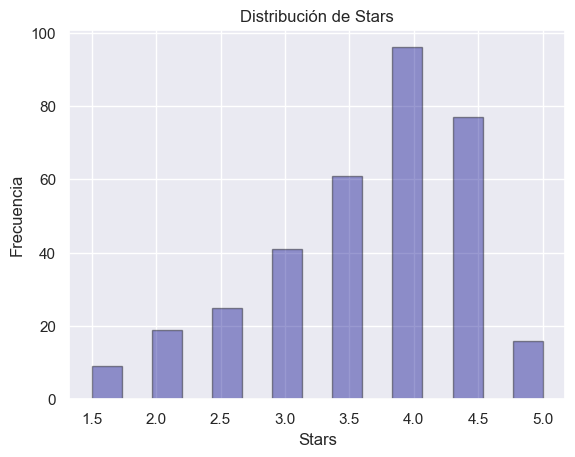

In [98]:
df_filtrado['stars'] = df_filtrado['stars'].astype(float)
sns.distplot(df_filtrado['stars'], bins=15, kde=False, color='darkblue', hist_kws={'edgecolor':'black'})

plt.title('Distribución de Stars')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')
plt.show()

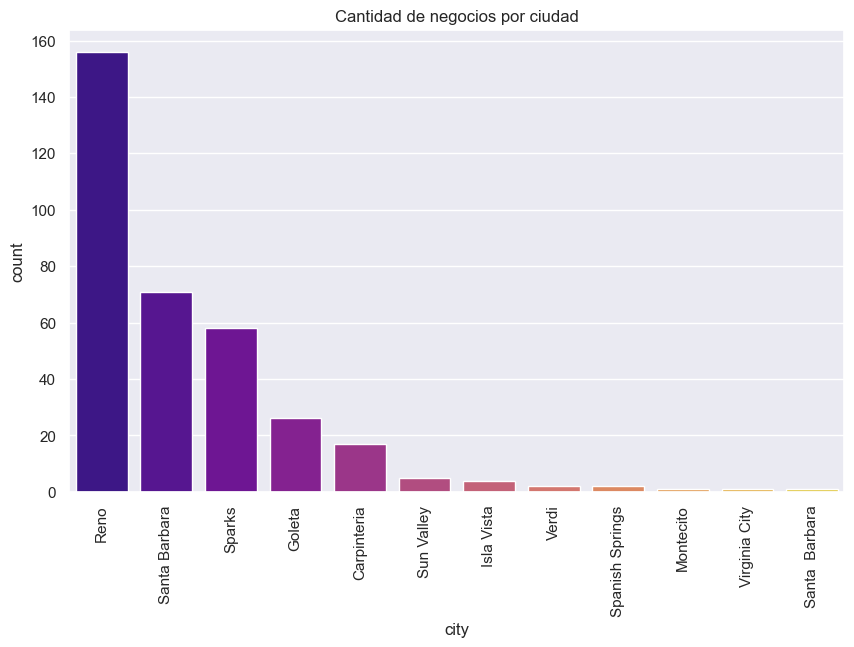

In [99]:
plt.figure(figsize=(10, 6))  
sns.set(style="darkgrid")  
sns.countplot(data=df_filtrado, x='city', palette='plasma', order=df_filtrado['city'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de negocios por ciudad')
plt.show()

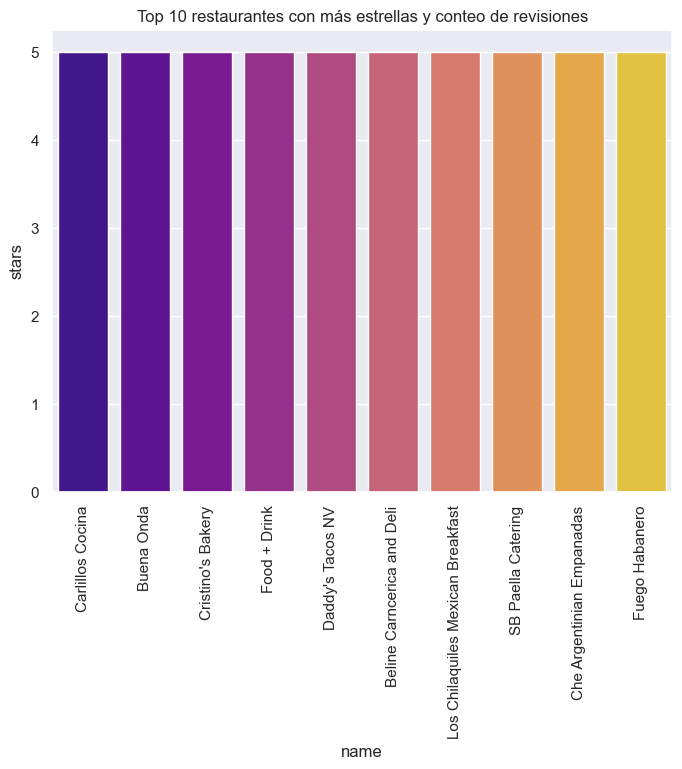

In [100]:
df_filtrado['review_count'] = df_filtrado['review_count'].astype(int)
df_sorted = df_filtrado.sort_values(by=['stars', 'review_count'], ascending=False)


top_restaurants = df_sorted.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_restaurants, x='name', y='stars', palette='plasma')
plt.xticks(rotation=90)
plt.title('Top 10 restaurantes con más estrellas y conteo de revisiones')
plt.show()

In [101]:
df_filtrado_final= df_filtrado.to_csv('./Datasets/df_business.csv', index=False)